In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdt
# matplotlib의 rc를 import하면서 폰트 한글 설정 가능
from matplotlib import rc
rc('font', family='Malgun Gothic')
from paretochart import pareto
%matplotlib inline

ImportError: cannot import name 'pareto' from partially initialized module 'paretochart' (most likely due to a circular import) (c:\Users\admin\anaconda3\lib\site-packages\paretochart\__init__.py)

In [14]:
death = np.array([2, 1, 2, 4, 2, 5, 3, 3, 5, 6, 3, 8, 3,
                  3, 6, 3, 6, 5, 3, 5, 2, 6, 2, 3, 4, 3,
                  2, 9, 2, 2, 3, 2, 7, 3, 2, 10, 6, 2, 3,
                  1, 2, 3, 3, 4, 3, 2, 6, 2, 2, 3, 2, 3,
                  4, 3, 2, 3, 5, 2, 5, 5, 3, 4, 3, 6, 2,
                  1, 2, 3, 2, 6, 3, 3, 6, 3, 2, 3, 6, 4,
                  6, 5, 3, 5, 6, 2, 6, 3, 2, 3, 2, 6, 2,
                  6, 3, 3, 2, 6, 9, 6, 3, 6, 6, 2, 3, 2,
                  3, 5, 3, 5, 2, 3, 2, 3, 3, 1, 3, 3, 2,
                  3, 3, 4, 3, 6, 6, 3, 3, 3, 2, 3, 3, 6])
# pd.crosstab() 함수를 통해 도수분포로 배치
# 혹은 Series 생성 이후 value_counts() 메서드 활용
table = pd.crosstab(index=pd.Series(death), colnames=['질병'], columns='도수')
table.index = ["감염","각종암","순환기","호흡기","소화기",
               "사고사","비뇨기","정신병","노환","신경계"]
table

질병,도수
감염,4
각종암,33
순환기,48
호흡기,7
소화기,11
사고사,22
비뇨기,1
정신병,1
노환,2
신경계,1


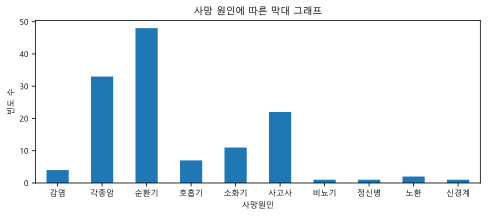

In [27]:
fig, ax = plt.subplots(1, 1, figsize=(8, 3))
# legend=False 인자 전달하여 범례 제거 가능
# color 파라미터는 리스트로도 전달 가능
table.plot.bar(rot=0, legend=False, ax=ax)
ax.set_xlabel('사망원인')
ax.set_ylabel('빈도 수')
ax.set_title('사망 원인에 따른 막대 그래프')
# plt.rc() 함수 사용하여 글씨 크기들 조절 가능
plt.rc('font', size=8)

<AxesSubplot:ylabel='도수'>

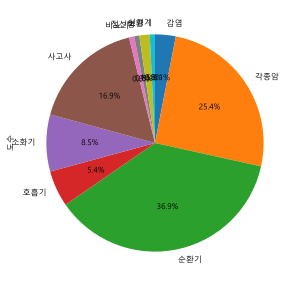

In [39]:
fig, ax = plt.subplots(1, 1, figsize=(6, 5))
# pie 그래프를 바로 가져오려면 Series 형태여야 -> squeeze() 메서드 이용해 변경
# startangle, counterclock 파라미터 활용하여 시작점, 방향 변경
table.squeeze().plot.pie(startangle=90, counterclock=False, autopct='%.1f%%', ax=ax)

In [77]:
table2 = pd.DataFrame(death, columns=['질병코드'])
table2 = table2.replace(dict(zip(range(1, 11), ["감염", "각종암", "순환기", "호흡기", "소화기", "사고사", "비뇨기", "정신병", "노환", "신경계"])))
table_index2 = table2.value_counts(normalize=True).index[:3]
# 왜 MultiIndex로 나오지..?
table2.value_counts().index
#table2['질병코드'].isin(table_index2)

MultiIndex([('순환기',),
            ('각종암',),
            ('사고사',),
            ('소화기',),
            ('호흡기',),
            ( '감염',),
            ( '노환',),
            ('비뇨기',),
            ('신경계',),
            ('정신병',)],
           names=['질병코드'])

<AxesSubplot:>

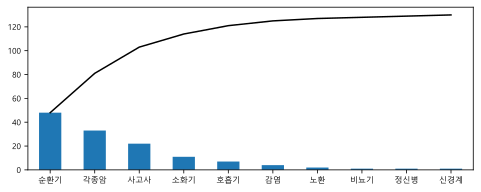

In [94]:
# pandas 및 matplotlib만 활용하여 파레토차트 그리기 -> 같은 ax에 바 그래프와 선 그래프 삽입
fig, ax = plt.subplots(1, 1, figsize=(8, 3))
(table
.sort_values('도수', ascending=False)
.assign(누적도수=lambda df: df['도수'].cumsum())
['도수']
.plot.bar(ax=ax, rot=0)
)
(table
.sort_values('도수', ascending=False)
.assign(누적도수=lambda df: df['도수'].cumsum())
['누적도수']
.plot(ax=ax, color='black', rot=0)
)